In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

In [2]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file from URL
et.data.path = os.path.join(et.io.HOME, "earth-analytics", "data")
et.data.get_data(url=avg_monthly_precip_url)

'/Users/judith/earth-analytics/data/earthpy-downloads/avg-precip-months-seasons.csv'

In [3]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))
os.getcwd()

'/Users/judith/earth-analytics'

In [4]:
# Import data from .csv file

fname = os.path.join("data",
                     "earthpy-downloads",
                     "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In [5]:
avg_monthly_precip.describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


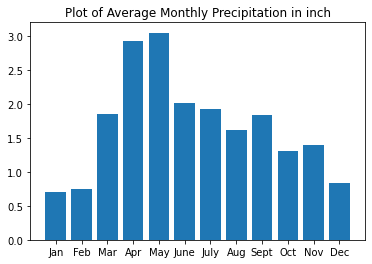

In [6]:
f, ax = plt.subplots()

ax.bar(x = avg_monthly_precip.months,
       height = avg_monthly_precip.precip)
ax.set(title = "Plot of Average Monthly Precipitation in inch")
plt.show()

In [7]:
# Group data by seasons and summarize precip
precip_by_season=avg_monthly_precip.groupby(["seasons"])[["precip"]].describe()
precip_by_season

precip                                                    
         count      mean       std   min    25%   50%    75%   max
seasons                                                           
Fall       3.0  1.513333  0.285715  1.31  1.350  1.39  1.615  1.84
Spring     3.0  2.610000  0.660908  1.85  2.390  2.93  2.990  3.05
Summer     3.0  1.856667  0.209841  1.62  1.775  1.93  1.975  2.02
Winter     3.0  0.763333  0.070946  0.70  0.725  0.75  0.795  0.84

In [8]:
# Drop a level so there is only one index
precip_by_season.columns = precip_by_season.columns.droplevel(0)
precip_by_season

,count,mean,std,min,25%,50%,75%,max
seasons,,,,,,,,
Fall,3.0,1.513333,0.285715,1.31,1.350,1.39,1.615,1.84
Spring,3.0,2.610000,0.660908,1.85,2.390,2.93,2.990,3.05
Summer,3.0,1.856667,0.209841,1.62,1.775,1.93,1.975,2.02
Winter,3.0,0.763333,0.070946,0.70,0.725,0.75,0.795,0.84


In [9]:
precip_by_season *= 25.4

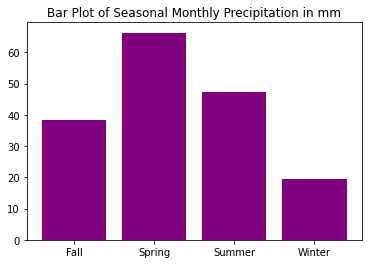

In [10]:
# Plot the data
f, ax = plt.subplots()

ax.bar(precip_by_season.index,
        precip_by_season["mean"],
        color="purple")

ax.set(title="Bar Plot of Seasonal Monthly Precipitation in mm")
plt.show()

In [11]:
# Save to new dataframe with original index
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"], as_index=False)[["precip"]].median()

avg_monthly_precip_median

,seasons,precip
0,Fall,1.39
1,Spring,2.93
2,Summer,1.93
3,Winter,0.75


In [12]:
# Select first row and first column
# Select first two rows and first column
avg_monthly_precip.iloc[0:1, 0:3]

,months,precip,seasons
0,Jan,0.7,Winter


In [13]:
avg_monthly_precip[["months"]]

,months
0,Jan
1,Feb
2,Mar
3,Apr
4,May
5,June
6,July
7,Aug
8,Sept
9,Oct


In [14]:
# Select rows with Summer in seasons
summer_precip = avg_monthly_precip[avg_monthly_precip["seasons"] == "Summer"]

# Save rows with values greater than 2.0 to new dataframe
gt2_avg_monthly_precip = avg_monthly_precip[avg_monthly_precip["precip"] > 2.0]

gt2_avg_monthly_precip

,months,precip,seasons
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
